Problem Statement : Given a dataset of wholesale customers' annual spending across various product categories, apply K-Means clustering to group customers based on their purchasing patterns. The goal is to identify meaningful customer segments that can help the business make data-driven decisions in sales, marketing, and inventory management.

Datase: Wholesale Customers Dataset 

In [382]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [384]:
df=pd.read_csv("Wholesale customers data.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [386]:
df.shape

(440, 8)

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [390]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [392]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [394]:
missing_count=df.isnull().sum()
missing_count

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

No missing value in given dataset

In [397]:
duplicated_count=df.duplicated().sum()
duplicated_count

0

No duplicate value in given dataset

EDA

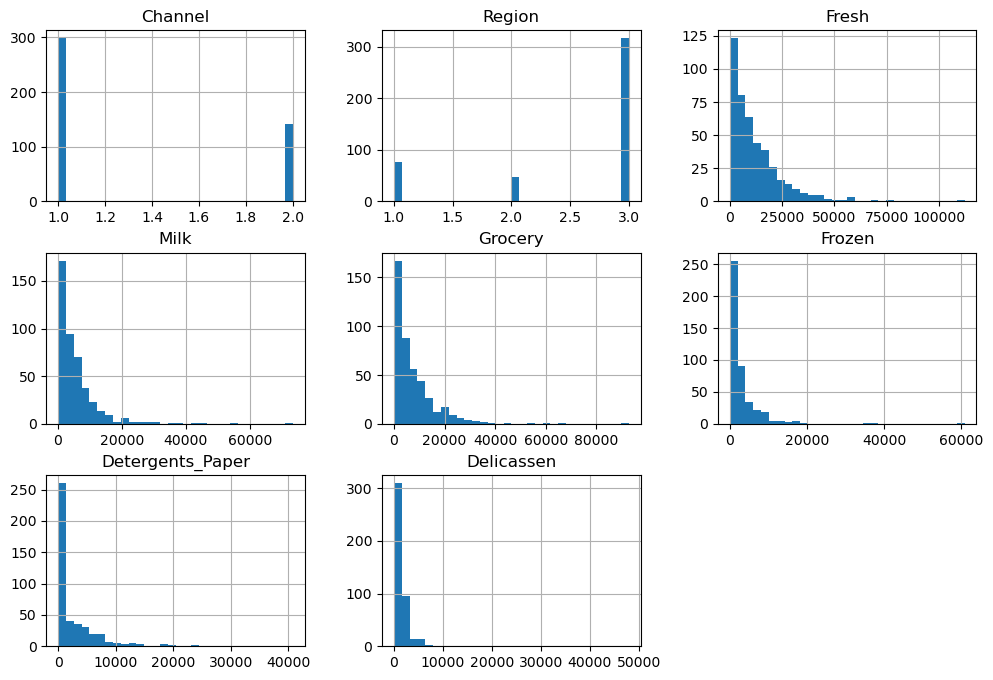

In [401]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for each feature
df.hist(figsize=(12,8), bins=30)
plt.show()

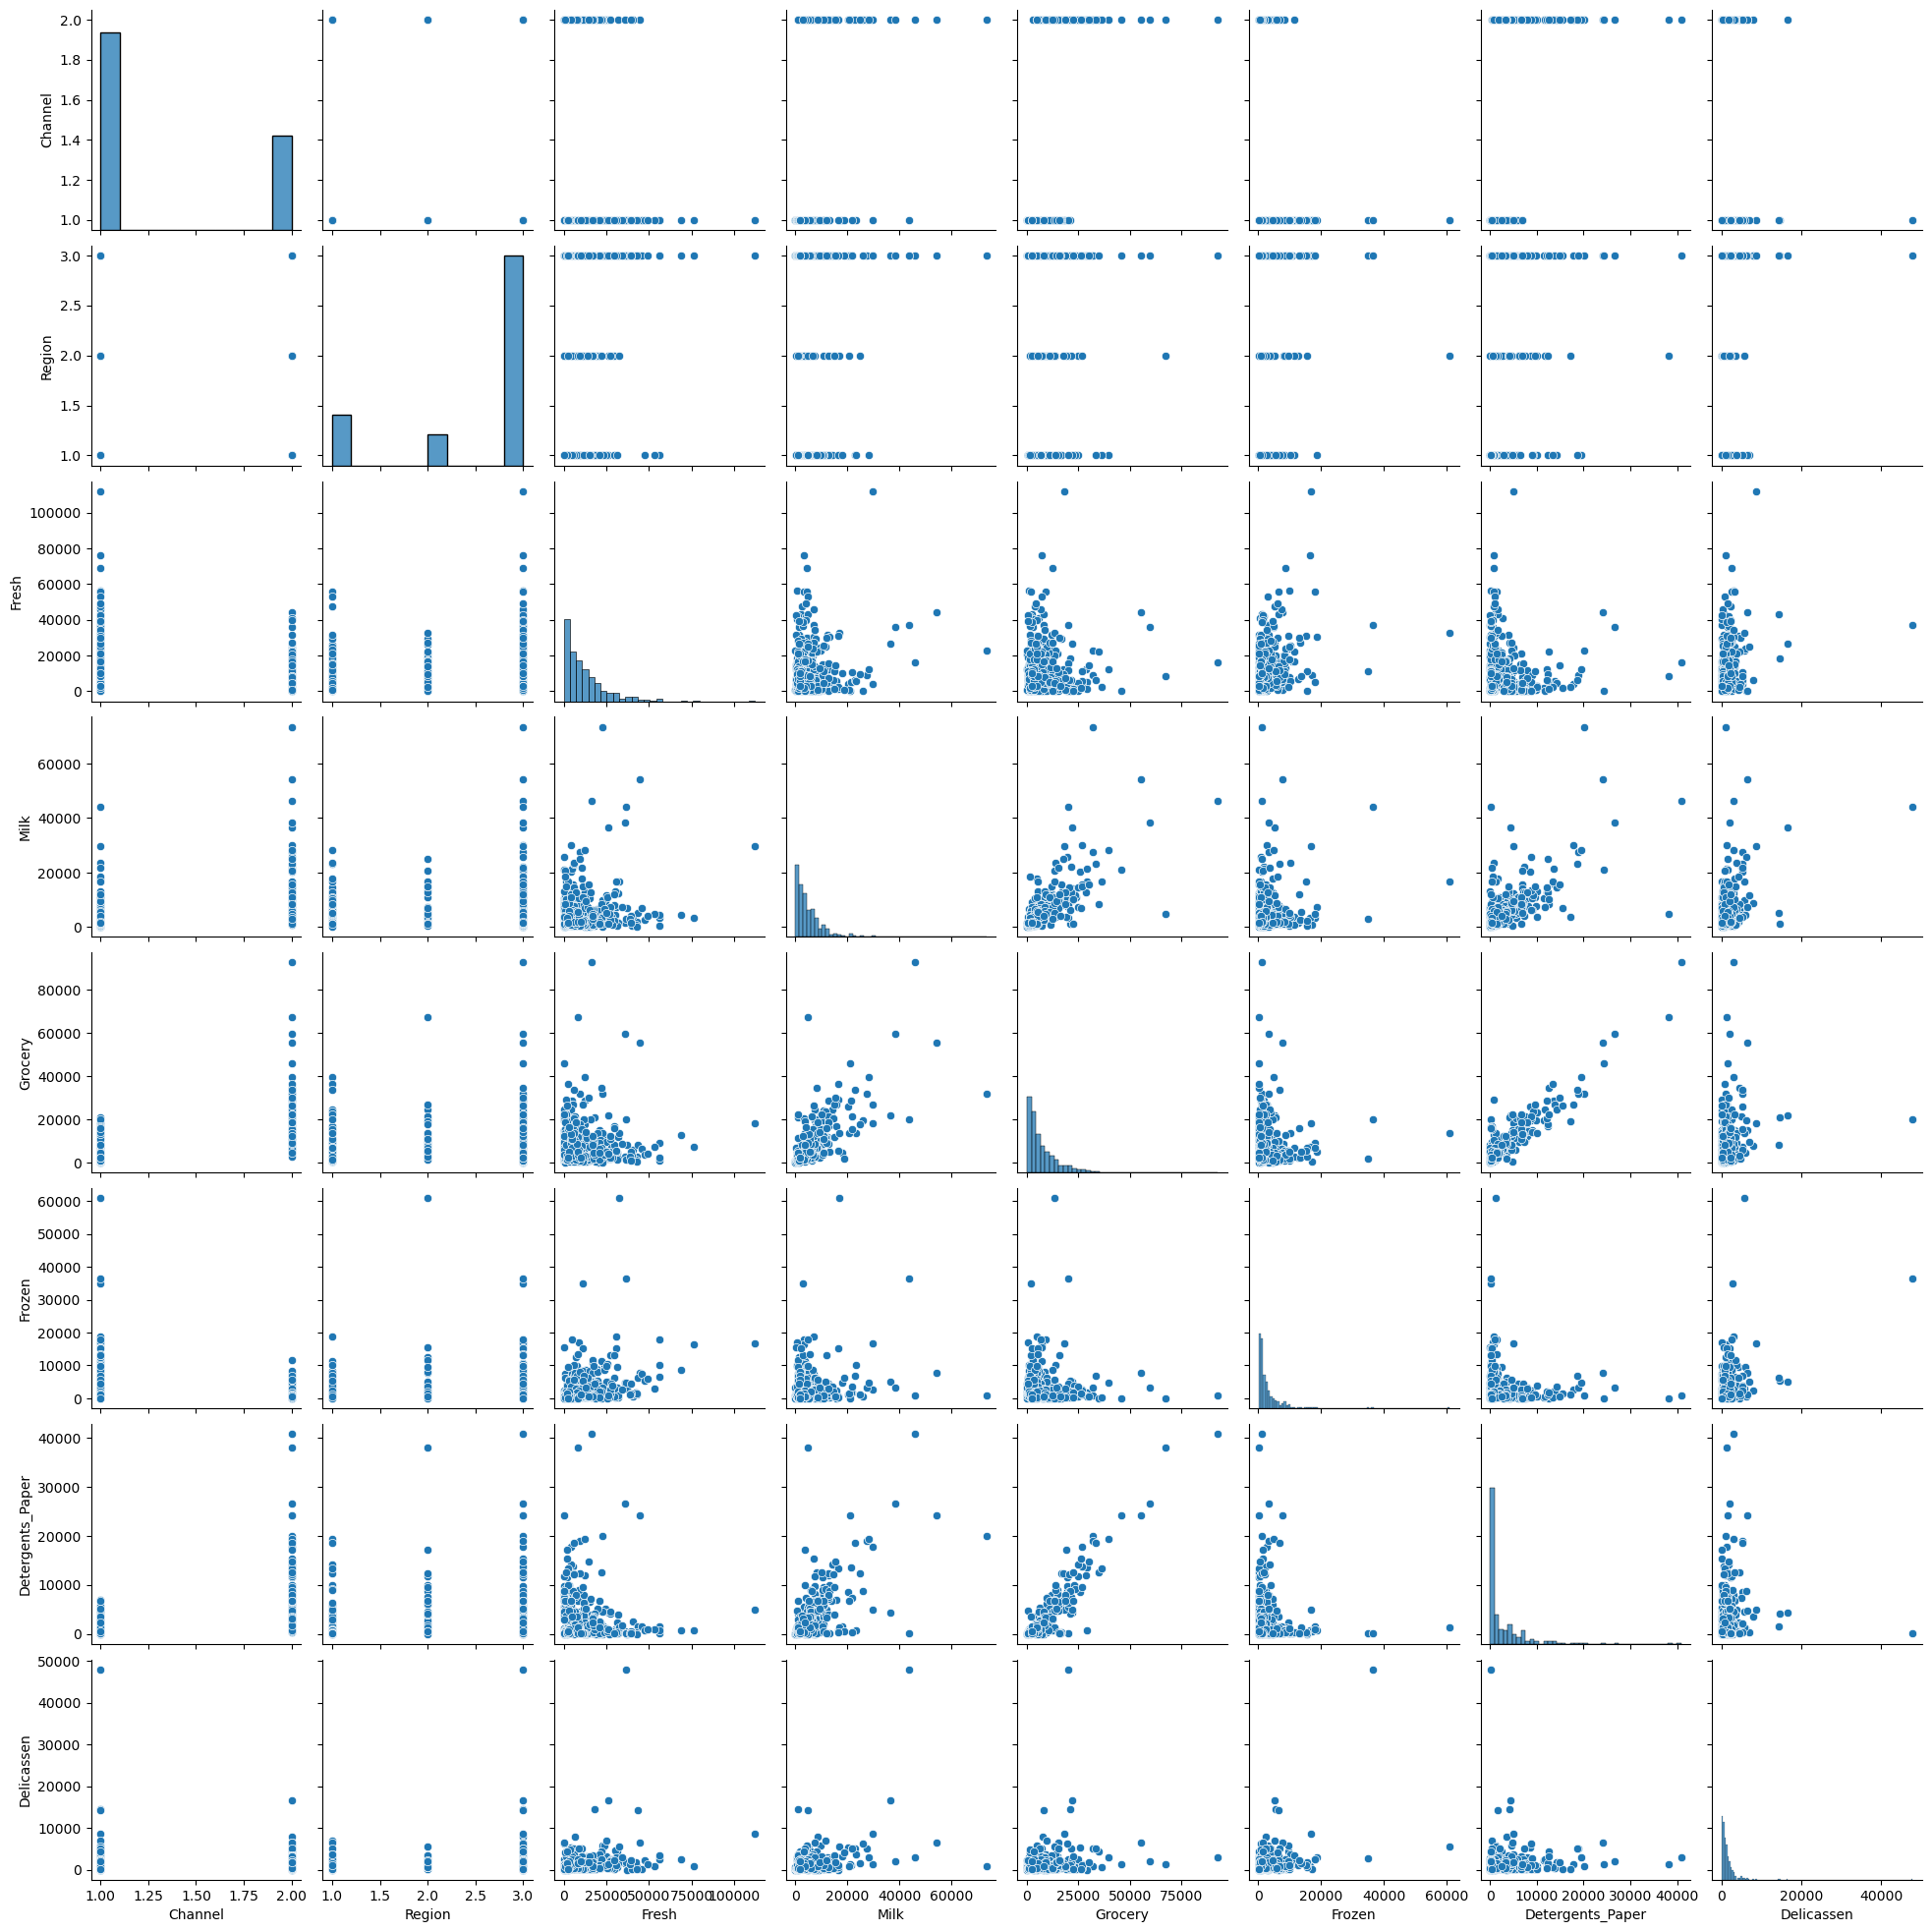

In [402]:
# Exploratory Data Analysis (EDA)
sns.pairplot(df)
plt.show()

The boxplot indicates numerous outliers across all spending categories, especially in "Fresh," "Grocery," and "Milk." To remove outliers, we can use the IQR (Interquartile Range) method, which is a robust way to detect and filter extreme values.

In [405]:
# Drop categorical columns
numerical_features = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]
df_numerical = df[numerical_features]

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=numerical_features)


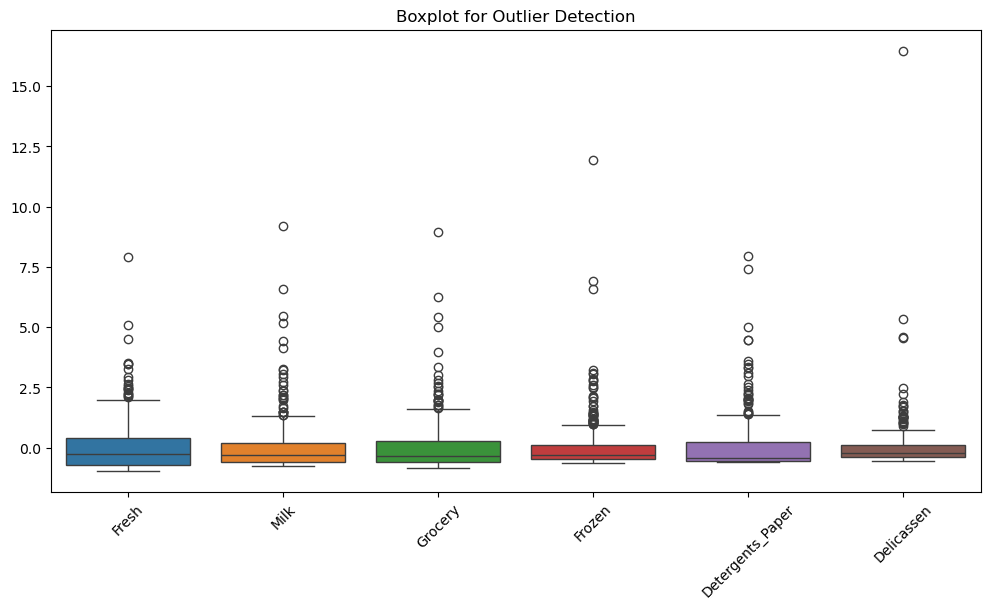

In [406]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled)
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()


In [410]:
# Calculate IQR
Q1 = df_scaled.quantile(0.25)
Q3 = df_scaled.quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df_scaled[~((df_scaled < lower_bound) | (df_scaled > upper_bound)).any(axis=1)]

# Print new dataset shape
print("Shape before outlier removal:", df_scaled.shape)
print("Shape after outlier removal:", df_cleaned.shape)


Shape before outlier removal: (440, 6)
Shape after outlier removal: (332, 6)


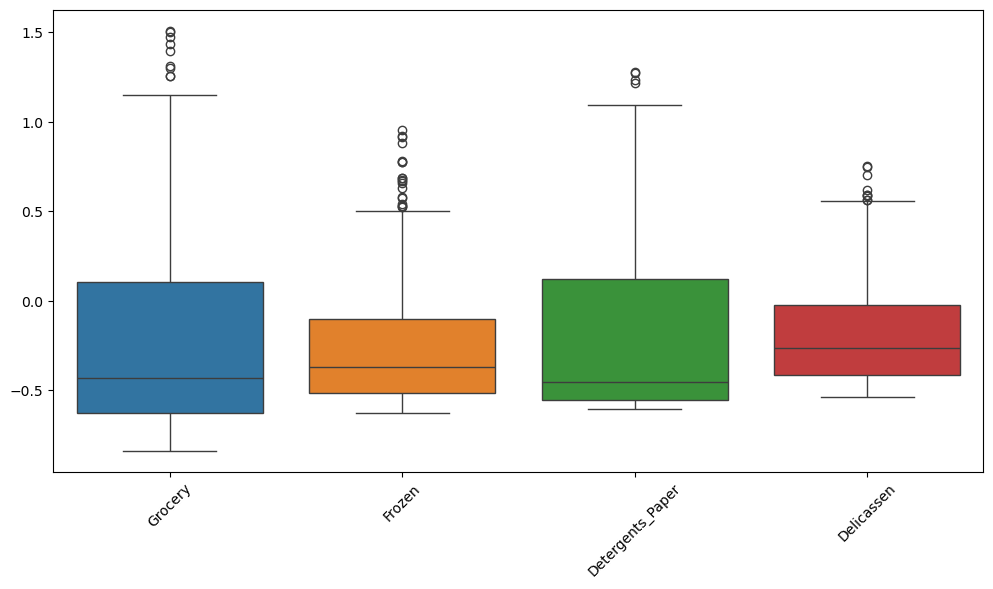

In [412]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_cleaned.iloc[:, 2:])  # Exclude 'Channel' and 'Region'
plt.xticks(rotation=45)
plt.show()

Large Number of outliers are reomved

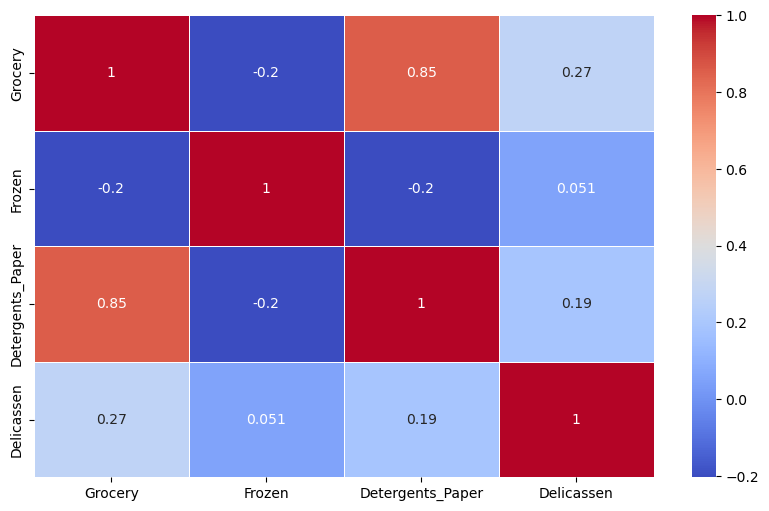

In [415]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df_cleaned.iloc[:, 2:].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


Grocery, Milk, and Detergents_Paper are highly correlated, meaning they are often purchased together.

Fresh and Frozen products show weak or negative correlations with other categories, implying they might cater to different customer preferences.

In [418]:
df_cleaned.shape

(332, 6)

C:\Users\ML\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ML\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ML\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ML\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

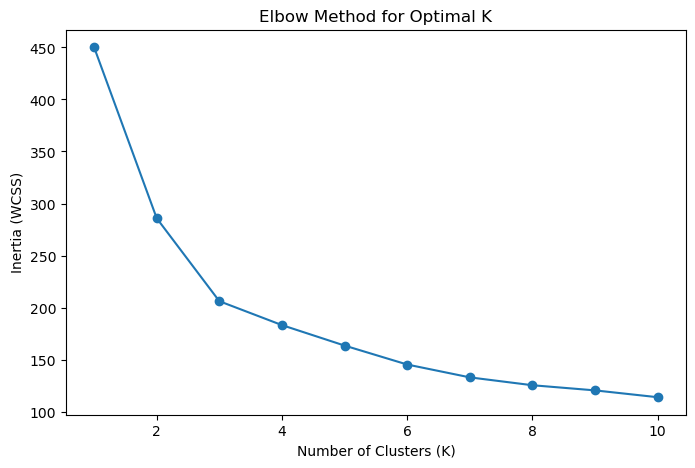

In [420]:
# Try different values of K
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cleaned)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()


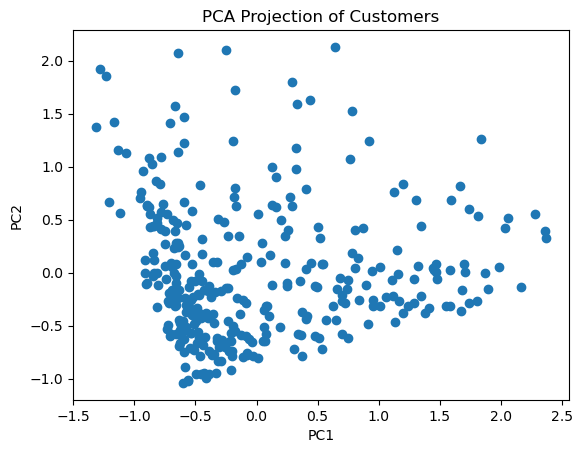

In [422]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df = pca.fit_transform(df_cleaned)

plt.scatter(df[:,0], df[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection of Customers")
plt.show()


The optimal value of K is around 3 or 4, as beyond this point, adding more clusters results in a smaller reduction in WCSS, meaning additional clusters offer diminishing returns in compactness.

C:\Users\ML\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ML\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ML\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ML\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

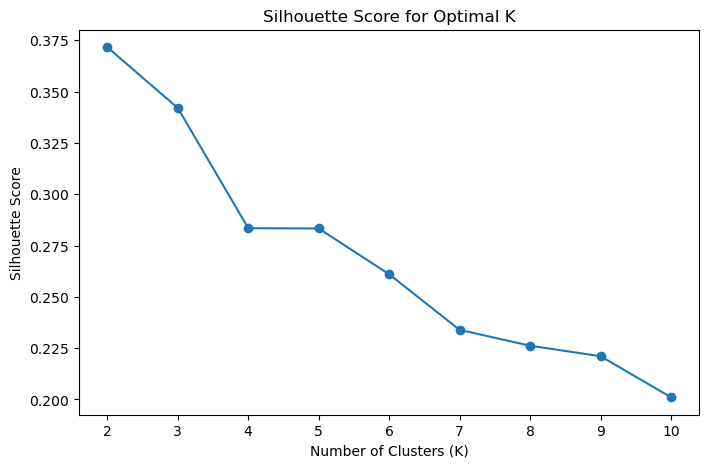

In [425]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_cleaned)
    score = silhouette_score(df_cleaned, labels)
    silhouette_scores.append(score)

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal K")
plt.show()



Silhouette Score is high at k=2 so  take the optimal value of k as 2.
K=2

In [428]:
# Apply K-Means with optimal K
optimal_k = 2 # Set based on Elbow & Silhouette Score
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_cleaned["Cluster"] = kmeans.fit_predict(df_cleaned)


print(df_cleaned.head())


      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
0  0.052933  0.523568 -0.041115 -0.589367         -0.043569   -0.066339   
1 -0.391302  0.544458  0.170318 -0.270136          0.086407    0.089151   
3  0.100111 -0.624020 -0.392977  0.687144         -0.498588    0.093411   
5 -0.204806  0.334067 -0.297637 -0.496155         -0.228138   -0.026224   
6  0.009950 -0.352316 -0.102849 -0.534512          0.054280   -0.347854   

   Cluster  
0        0  
1        0  
3        1  
5        1  
6        1  


C:\Users\ML\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ML\AppData\Local\Temp\ipykernel_12944\3579496961.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Cluster"] = kmeans.fit_predict(df_cleaned)


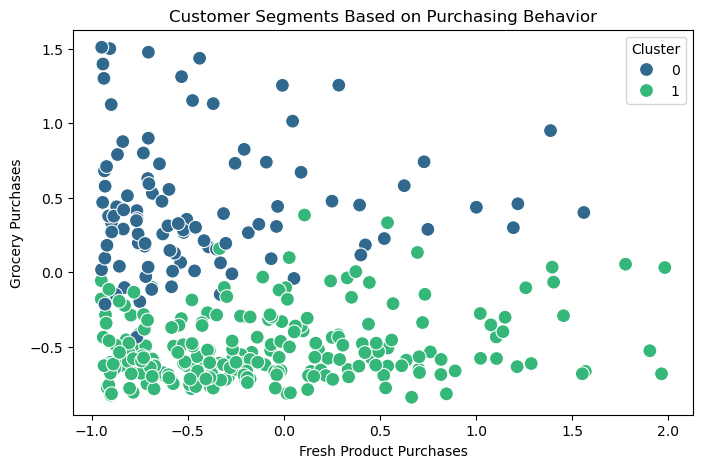

In [430]:
# Scatter plot of clusters using two features
plt.figure(figsize=(8, 5))

# Choose two relevant numerical columns
sns.scatterplot(x=df_cleaned['Fresh'], y=df_cleaned['Grocery'], hue=df_cleaned['Cluster'], palette='viridis', s=100)

plt.xlabel("Fresh Product Purchases")
plt.ylabel("Grocery Purchases")
plt.title("Customer Segments Based on Purchasing Behavior")
plt.legend(title="Cluster")
plt.show()


In [432]:
y_pred = kmeans.labels_
print("Silhouette Score:", silhouette_score(df_cleaned, y_pred))

Silhouette Score: 0.45108925499028296


C:\Users\ML\AppData\Local\Temp\ipykernel_12944\3004036097.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cleaned['Cluster'], y=df_cleaned['Fresh'], palette='Set2')


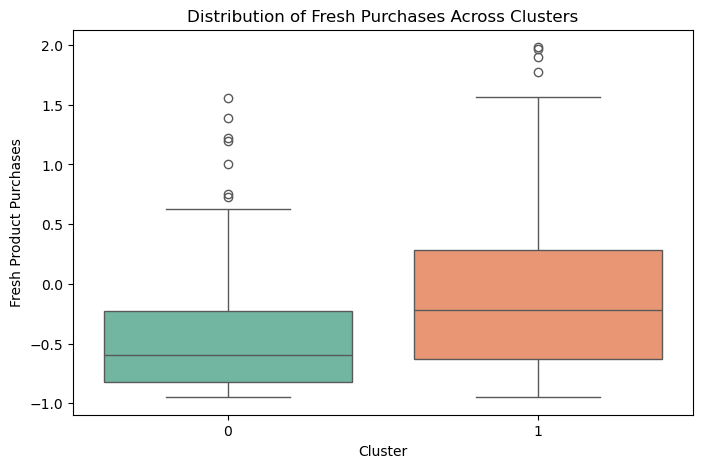

In [434]:
# Boxplot to analyze distribution of "Fresh" purchases across clusters
plt.figure(figsize=(8, 5))

sns.boxplot(x=df_cleaned['Cluster'], y=df_cleaned['Fresh'], palette='Set2')

plt.xlabel("Cluster")
plt.ylabel("Fresh Product Purchases")
plt.title("Distribution of Fresh Purchases Across Clusters")
plt.show()


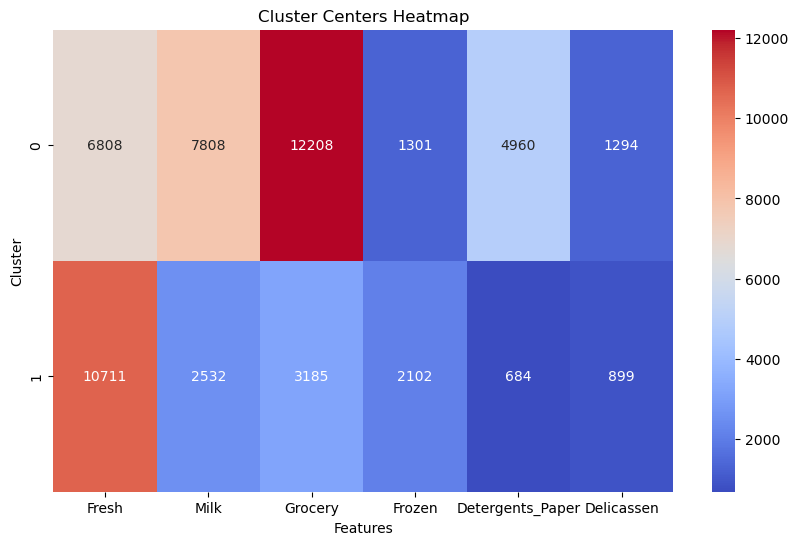

In [436]:
# Convert cluster centers back to original scale
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), 
                               columns=df_cleaned.columns[:-1])  # Exclude Cluster column

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers, annot=True, cmap="coolwarm", fmt=".0f")

plt.title("Cluster Centers Heatmap")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.show()
